In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-francois gp
saint-philippe re
santa cruz cr
vila velha br
quatre cocos mu
richards bay za
port hardy ca
narsaq gl
svetlyy ru
rawson ar
bethel us
port alfred za
bluff nz
bredasdorp za
myslenice pl
georgetown sh
lorengau pg
busselton au
mahebourg mu
taolanaro mg
barrow us
bontang id
chokurdakh ru
boyolangu id
yellowknife ca
hermanus za
dingli mt
vaini to
punta arenas cl
punta arenas cl
amderma ru
hithadhoo mv
yellowknife ca
bethel us
pavlodar kz
bengkulu id
port alfred za
atuona pf
aksay kz
batticaloa lk
bluff nz
taolanaro mg
san cristobal ec
bengkulu id
butaritari ki
namatanai pg
upernavik gl
albany au
cape town za
vanavara ru
attawapiskat ca
mahebourg mu
lorengau pg
punta arenas cl
provideniya ru
atuona pf
alta floresta br
tautira pf
arraial do cabo br
kurilsk ru
albany au
cape town za
puerto ayora ec
kruisfontein za
walvis bay na
punta arenas cl
mataura pf
busselton au
thompson ca
kaitangata nz
kaitangata nz
qaqortoq gl
eureka us
huarmey pe
qaanaaq gl
bluff nz
sorvag fo
balikpap

prince rupert ca
saskylakh ru
upernavik gl
marcona pe
rawson ar
beringovskiy ru
mys shmidta ru
igarka ru
ushuaia ar
oistins bb
helong cn
hilo us
santa rosa bo
bluff nz
busselton au
mahebourg mu
yellowknife ca
bubaque gw
amderma ru
chuy uy
puerto ayora ec
ferrol es
bonavista ca
huarmey pe
kapaa us
carnarvon au
busselton au
evensk ru
vaini to
chokurdakh ru
taolanaro mg
mataura pf
fort morgan us
novikovo ru
atuona pf
albany au
san juan us
parry sound ca
laguna br
georgetown sh
ust-kut ru
qaanaaq gl
monrovia lr
bitung id
misratah ly
avarua ck
coro ve
manbij sy
acapulco mx
upernavik gl
worland us
esperance au
arraial do cabo br
kudahuvadhoo mv
olga ru
busselton au
punta arenas cl
araouane ml
tateyama jp
atuona pf
qaanaaq gl
lebu cl
mataura pf
sobolevo ru
ilulissat gl
petropavlovskoye ru
hobart au
hermanus za
pevek ru
marstal dk
kamaishi jp
grand river south east mu
meulaboh id
marsaxlokk mt
ponta do sol cv
bluff nz
avarua ck
albany au
guerrero negro mx
jamestown sh
lebu cl
rikitea pf
dergac

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

616

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | santa cruz
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | quatre cocos
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | svetlyy
Processing Record 10 of Set 1 | rawson
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | myslenice
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | bontang
Processing Record 23 of Set 1 | chokurdakh
Processing R

Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | baiyin
Processing Record 43 of Set 4 | albury
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | bodden town
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | korla
Processing Record 49 of Set 4 | krasnodon
Processing Record 50 of Set 4 | kirakira
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | mayor pablo lagerenza
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | kaili
Processing Record 7 of Set 5 | vestmannaeyjar
Processing Record 8 of Set 5 | the crossings
Processing Record 9 of Set 5 | meyungs
City not found. Skipping...
Processing Record 10 of Set 5 | naze
Processing Record 11 of Set 5 | kailahun
Processing Record 12 of Set 5 | nikolskoye
Processing Record 13 of Set 5 | olafsvik
Processing Record 14 

Processing Record 31 of Set 8 | marsaxlokk
Processing Record 32 of Set 8 | dergachi
Processing Record 33 of Set 8 | wailuku
Processing Record 34 of Set 8 | saint-michel-des-saints
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | kijang
Processing Record 38 of Set 8 | magsalangi
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | dumbarton
Processing Record 41 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 8 | ocu
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | porto novo
Processing Record 45 of Set 8 | clarence town
Processing Record 46 of Set 8 | maningrida
Processing Record 47 of Set 8 | cherrapunji
Processing Record 48 of Set 8 | xichang
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 50 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 1 of Set 9 | twin falls
Processing Record 2 of Se

Processing Record 16 of Set 12 | la ligua
Processing Record 17 of Set 12 | vila
Processing Record 18 of Set 12 | owando
Processing Record 19 of Set 12 | shakawe
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | yuyao
Processing Record 22 of Set 12 | todos santos
Processing Record 23 of Set 12 | polunochnoye
Processing Record 24 of Set 12 | karaul
City not found. Skipping...
Processing Record 25 of Set 12 | matara
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | pimenta bueno
Processing Record 28 of Set 12 | mgandu
Processing Record 29 of Set 12 | westpunt
City not found. Skipping...
Processing Record 30 of Set 12 | santa vitoria do palmar
Processing Record 31 of Set 12 | bolivar
Processing Record 32 of Set 12 | mujiayingzi
Processing Record 33 of Set 12 | aktau
Processing Record 34 of Set 12 | la baule-escoublac
Processing Record 35 of Set 12 | pangoa
Processing Record 36 of Set 12 | iquique
Processing R

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Francois,46.4154,3.9054,42.67,100,100,6.91,FR,2022-02-03 08:47:28
1,Saint-Philippe,-21.3585,55.7679,79.11,97,100,34.76,RE,2022-02-03 08:47:29
2,Santa Cruz,-17.8000,-63.1667,72.86,94,20,6.91,BO,2022-02-03 08:45:04
3,Vila Velha,-20.3297,-40.2925,75.15,97,75,2.30,BR,2022-02-03 08:47:30
4,Quatre Cocos,-20.2078,57.7625,79.09,91,100,23.85,MU,2022-02-03 08:47:31
5,Richards Bay,-28.7830,32.0377,93.90,47,6,6.26,ZA,2022-02-03 08:47:32
6,Port Hardy,50.6996,-127.4199,40.75,93,100,12.66,CA,2022-02-03 08:46:10
7,Narsaq,60.9167,-46.0500,23.22,94,100,10.56,GL,2022-02-03 08:47:33
8,Svetlyy,54.6750,20.1347,32.97,93,98,10.40,RU,2022-02-03 08:47:33
9,Rawson,-43.3002,-65.1023,68.34,51,4,12.26,AR,2022-02-03 08:47:34


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Francois,FR,2022-02-03 08:47:28,46.4154,3.9054,42.67,100,100,6.91
1,Saint-Philippe,RE,2022-02-03 08:47:29,-21.3585,55.7679,79.11,97,100,34.76
2,Santa Cruz,BO,2022-02-03 08:45:04,-17.8000,-63.1667,72.86,94,20,6.91
3,Vila Velha,BR,2022-02-03 08:47:30,-20.3297,-40.2925,75.15,97,75,2.30
4,Quatre Cocos,MU,2022-02-03 08:47:31,-20.2078,57.7625,79.09,91,100,23.85
...,...,...,...,...,...,...,...,...,...
565,Istok,XK,2022-02-03 09:07:07,42.7808,20.4875,38.32,66,13,8.88
566,Svetlograd,RU,2022-02-03 09:07:08,45.3353,42.8547,44.58,67,96,5.64
567,Haverfordwest,GB,2022-02-03 09:07:08,51.8017,-4.9691,48.06,94,75,5.01
568,Ostrovnoy,RU,2022-02-03 09:07:09,68.0531,39.5131,19.94,88,100,13.65


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643879639.4922934

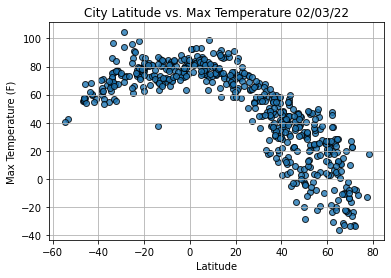

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

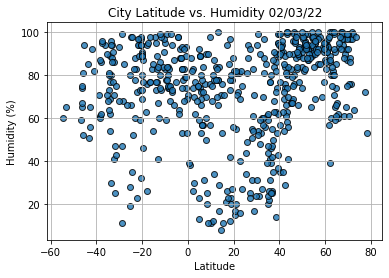

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

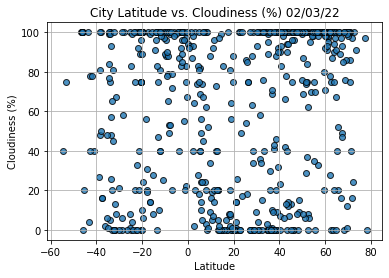

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

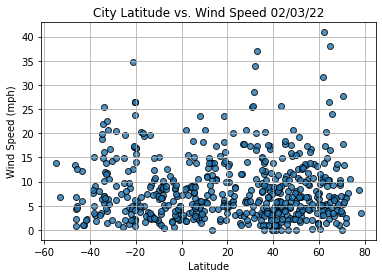

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Francois,FR,2022-02-03 08:47:28,46.4154,3.9054,42.67,100,100,6.91
6,Port Hardy,CA,2022-02-03 08:46:10,50.6996,-127.4199,40.75,93,100,12.66
7,Narsaq,GL,2022-02-03 08:47:33,60.9167,-46.0500,23.22,94,100,10.56
8,Svetlyy,RU,2022-02-03 08:47:33,54.6750,20.1347,32.97,93,98,10.40
10,Bethel,US,2022-02-03 08:47:35,41.3712,-73.4140,39.76,91,100,0.00


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

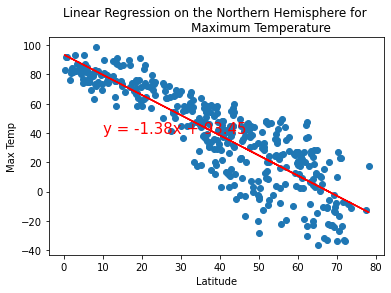

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n\
                       Maximum Temperature', 'Max Temp',(10,40))

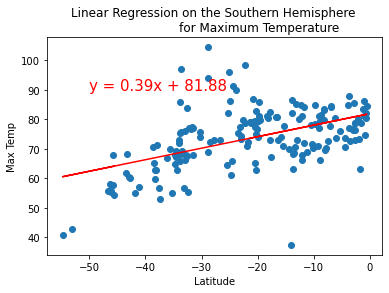

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                       for Maximum Temperature', 'Max Temp',(-50,90))

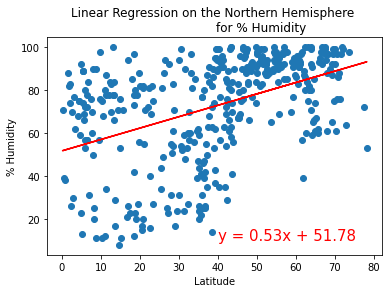

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

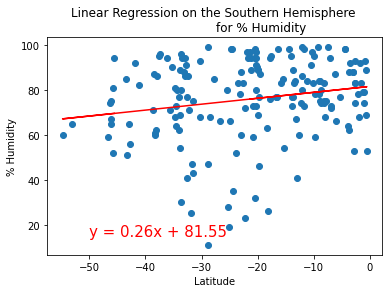

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

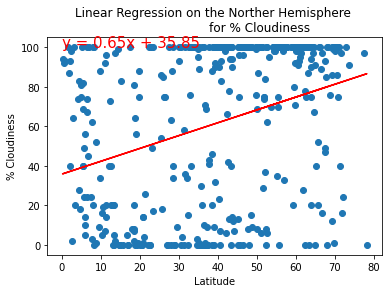

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Norther Hemisphere \n\
                       for % Cloudiness', '% Cloudiness',(0,100))

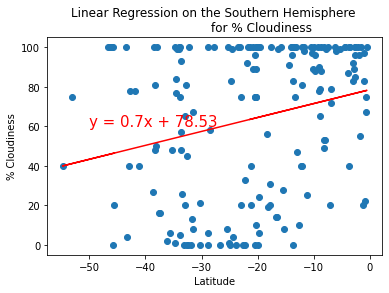

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

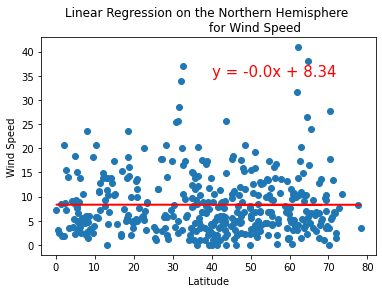

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

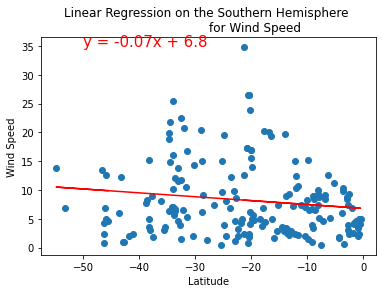

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))